### Edgar Moises Hernandez-Gonzalez
#### 27/11/19
#### Clasificacion de alfa de los canales C3 y C4 de MI-EEG con CNN-1D + GRU
##### 10 ejecuciones independientes para obtener la media y desviacion estandar

In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TimeDistributed, Conv1D, MaxPool1D, Flatten, GRU, Dense, Dropout
from sklearn.metrics import cohen_kappa_score, confusion_matrix, precision_recall_fscore_support

In [0]:
x_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/MI-EEG-Alfa-A01T.csv", header=None)
x_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/MI-EEG-Alfa-A01E.csv", header=None)
y_train = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/EtiquetasA01T.csv", header=None)
y_test = pd.read_csv("/content/drive/My Drive/BCI-IV-2a/AlfaC3C4/EtiquetasA01E.csv", header=None)

In [5]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(288, 510)
(288, 510)
(288, 1)
(288, 1)


In [6]:
n_samples_train = len(y_train)
n_samples_test = len(y_test) #en caso de no tener el y_test se puede utilizar el x_test

print("n_samples_train:", n_samples_train)
print("n_samples_test :", n_samples_test)

n_samples_train: 288
n_samples_test : 288


In [7]:
n_classes = len(np.unique(y_test)) #esto se podria calcular asi n_clases = len(np.unique(y)), la y puede ser train o test

print("n_classes:", n_classes)

n_classes: 4


In [0]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [9]:
#codificar etiquetas con valores de 0 a nClases-1
le = LabelEncoder().fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
#convertir de 2D a 4D
x_train = x_train.reshape((n_samples_train, 1, 255, 2))
x_test = x_test.reshape((n_samples_test, 1, 255, 2))

print(x_train.shape)
print(x_test.shape)

(288, 1, 255, 2)
(288, 1, 255, 2)


Iteration: 1
288/288 [==============================] - 0s 123us/sample - loss: 3.4797 - acc: 0.3021
kappa:  0.06944444444444442
confusion matrix:
 [[25 18 17 12]
 [26 19 12 15]
 [22  8 23 19]
 [24 11 17 20]]
(0.3083453273530593, 0.30208333333333337, 0.3022072988453054, None)


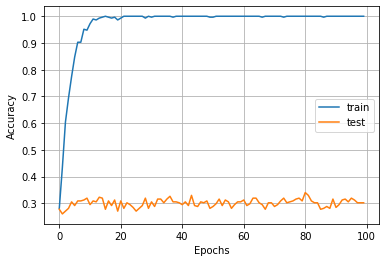

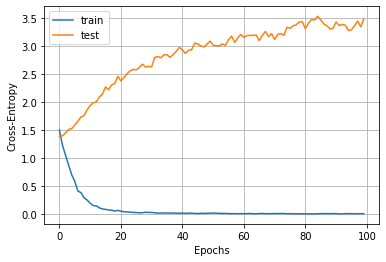

Iteration: 2
288/288 [==============================] - 0s 128us/sample - loss: 3.8054 - acc: 0.3160
kappa:  0.08796296296296291
confusion matrix:
 [[22 21 15 14]
 [21 22 11 18]
 [20  7 28 17]
 [17 12 24 19]]
(0.31705620833941517, 0.3159722222222222, 0.31564844948191373, None)


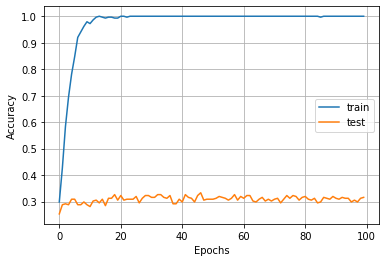

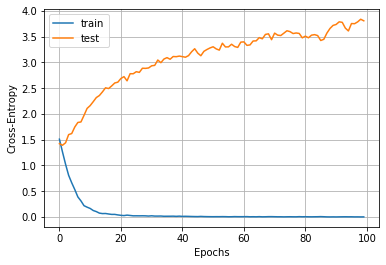

Iteration: 3
288/288 [==============================] - 0s 136us/sample - loss: 4.1080 - acc: 0.2778
kappa:  0.03703703703703709
confusion matrix:
 [[22 21 11 18]
 [23 20  8 21]
 [24  7 22 19]
 [28 12 16 16]]
(0.2905796463853979, 0.2777777777777778, 0.280912171531428, None)


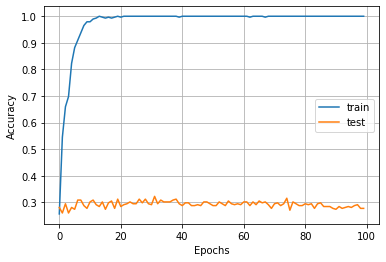

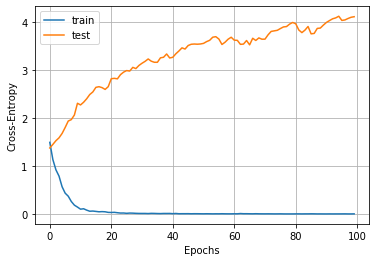

Iteration: 4
288/288 [==============================] - 0s 133us/sample - loss: 3.4939 - acc: 0.2882
kappa:  0.05092592592592593
confusion matrix:
 [[17 24 11 20]
 [19 25  7 21]
 [20  8 21 23]
 [20 16 16 20]]
(0.2965158459660983, 0.2881944444444444, 0.29041905844105137, None)


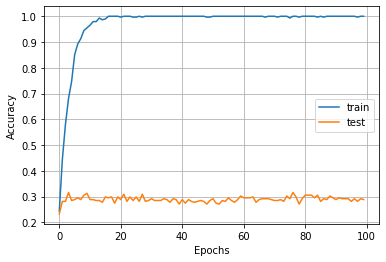

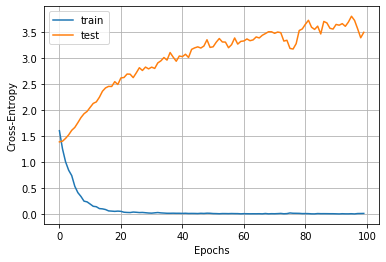

Iteration: 5
288/288 [==============================] - 0s 128us/sample - loss: 3.4829 - acc: 0.3264
kappa:  0.10185185185185186
confusion matrix:
 [[20 29 12 11]
 [18 34  7 13]
 [17 13 23 19]
 [22 18 15 17]]
(0.32707112316574805, 0.3263888888888889, 0.32306495872959323, None)


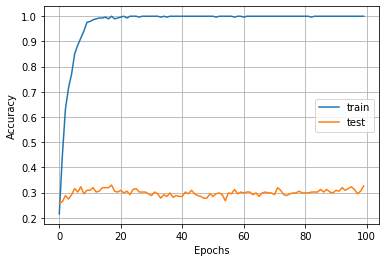

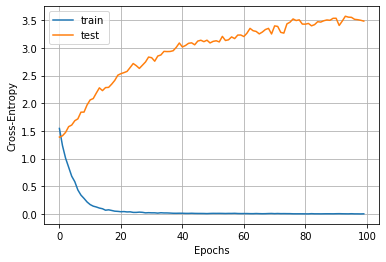

Iteration: 6
288/288 [==============================] - 0s 138us/sample - loss: 3.7311 - acc: 0.2778
kappa:  0.03703703703703709
confusion matrix:
 [[21 18 13 20]
 [21 20  9 22]
 [22  5 18 27]
 [24 10 17 21]]
(0.2912794153049863, 0.2777777777777778, 0.28020725667527996, None)


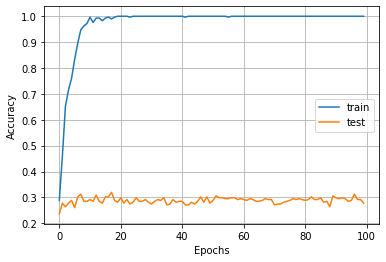

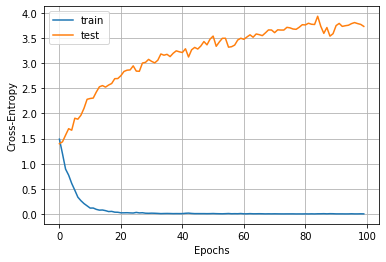

Iteration: 7
288/288 [==============================] - 0s 144us/sample - loss: 3.6326 - acc: 0.3090
kappa:  0.07870370370370372
confusion matrix:
 [[19 20 20 13]
 [17 25 13 17]
 [17  9 28 18]
 [17 13 25 17]]
(0.3079206891685198, 0.3090277777777778, 0.30748085656180785, None)


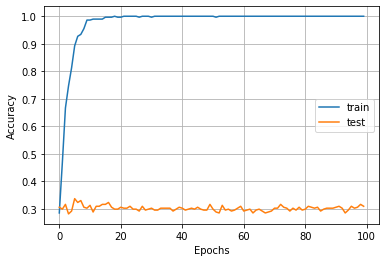

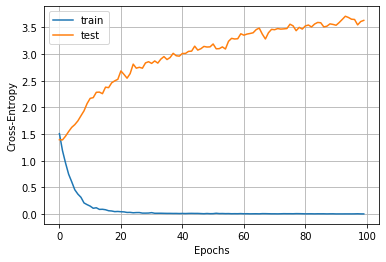

Iteration: 8
288/288 [==============================] - 0s 131us/sample - loss: 3.7777 - acc: 0.2917
kappa:  0.05555555555555558
confusion matrix:
 [[15 19 21 17]
 [17 18 15 22]
 [17 11 26 18]
 [15 11 21 25]]
(0.2893977016478481, 0.29166666666666663, 0.28888914781063196, None)


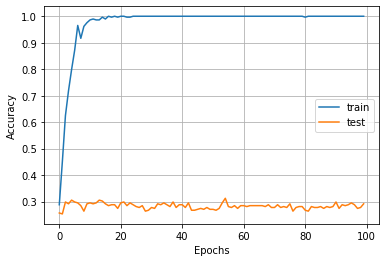

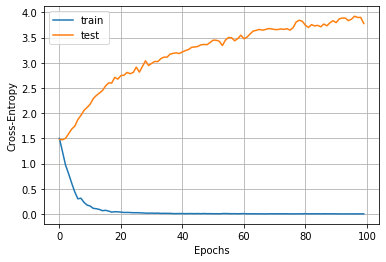

Iteration: 9
288/288 [==============================] - 0s 133us/sample - loss: 3.7021 - acc: 0.3021
kappa:  0.06944444444444442
confusion matrix:
 [[19 20 16 17]
 [21 24 10 17]
 [21  8 22 21]
 [19 12 19 22]]
(0.30664312366737745, 0.30208333333333337, 0.3036974881208338, None)


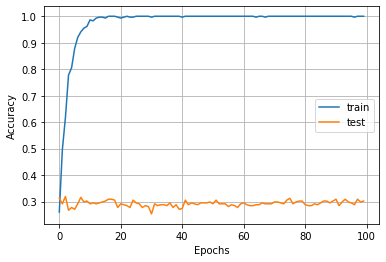

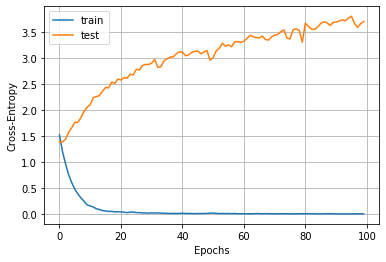

Iteration: 10
288/288 [==============================] - 0s 131us/sample - loss: 3.0192 - acc: 0.2708
kappa:  0.02777777777777779
confusion matrix:
 [[23 24 10 15]
 [25 21  7 19]
 [23 10 18 21]
 [25 12 19 16]]
(0.27792540379090463, 0.27083333333333337, 0.2713645766703321, None)


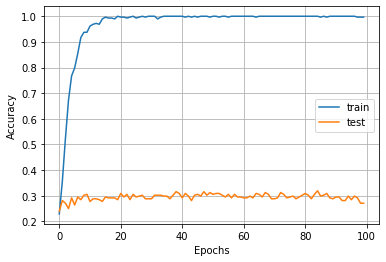

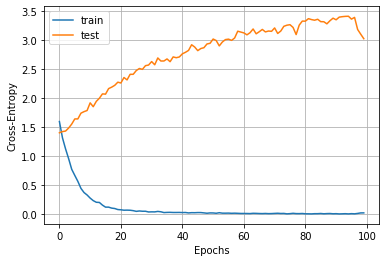


Resultados:
loss: [3.479666577445136, 3.8053970866733127, 4.1079619195726185, 3.493910074234009, 3.482868777381049, 3.7311291694641113, 3.6325972345140247, 3.7776755491892495, 3.7021411259969077, 3.0191793706681995]
accuracy: [0.30208334, 0.3159722, 0.2777778, 0.28819445, 0.3263889, 0.2777778, 0.3090278, 0.29166666, 0.30208334, 0.27083334]
kappa: [0.06944444444444442, 0.08796296296296291, 0.03703703703703709, 0.05092592592592593, 0.10185185185185186, 0.03703703703703709, 0.07870370370370372, 0.05555555555555558, 0.06944444444444442, 0.02777777777777779]
precision: [0.3083453273530593, 0.31705620833941517, 0.2905796463853979, 0.2965158459660983, 0.32707112316574805, 0.2912794153049863, 0.3079206891685198, 0.2893977016478481, 0.30664312366737745, 0.27792540379090463]
recall: [0.30208333333333337, 0.3159722222222222, 0.2777777777777778, 0.2881944444444444, 0.3263888888888889, 0.2777777777777778, 0.3090277777777778, 0.29166666666666663, 0.30208333333333337, 0.27083333333333337]
f1: [0.302

In [14]:
array_test_loss = []
array_test_acc = []
array_kappa = []
array_precision = []
array_recall = []
array_f1 = []
for i in range(10):
    print("Iteration:", i+1);
    
    model = Sequential()
    model.add(TimeDistributed(Conv1D(64, 7, activation='relu'), input_shape=(None,255,2)))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Flatten()))
    model.add(GRU(64))
    model.add(Dropout(0.5))
    model.add(Dense(n_classes, activation='softmax'))
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=100, batch_size=18, validation_data=(x_test, y_test), verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test)
    array_test_loss.append(test_loss)
    array_test_acc.append(test_acc)
    
    probabilidades = model.predict(x_test)
    y_pred = np.argmax(probabilidades, 1) #1=fila
    kappa = cohen_kappa_score(y_test, y_pred)
    print("kappa: ", kappa)
    array_kappa.append(kappa)
    matriz_confusion = confusion_matrix(y_test, y_pred)
    print("confusion matrix:\n", matriz_confusion)
    metricas = precision_recall_fscore_support(y_test, y_pred, average='macro')
    print(metricas)
    array_precision.append(metricas[0])
    array_recall.append(metricas[1])
    array_f1.append(metricas[2])
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'test'])
    plt.show()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Cross-Entropy')
    plt.legend(['train', 'test'])
    plt.show()
    
print()    
print("Resultados:")
print("loss:", array_test_loss)
print("accuracy:", array_test_acc)
print("kappa:", array_kappa)
print("precision:", array_precision)
print("recall:", array_recall)
print("f1:", array_f1)

In [15]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_38 (TimeDis (None, None, 249, 64)     960       
_________________________________________________________________
dropout_18 (Dropout)         (None, None, 249, 64)     0         
_________________________________________________________________
time_distributed_39 (TimeDis (None, None, 15936)       0         
_________________________________________________________________
gru_19 (GRU)                 (None, 64)                3072192   
_________________________________________________________________
dropout_19 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 260       
Total params: 3,073,412
Trainable params: 3,073,412
Non-trainable params: 0
___________________________________________

In [16]:
print("Mean: %.4f" % np.mean(array_test_acc))
print("std: (+/- %.4f)" % np.std(array_test_acc))
print("kappa: %.4f" % np.mean(array_kappa))
print("precision: %.4f" % np.mean(array_precision))
print("recall: %.4f" % np.mean(array_recall))
print("f1: %.4f" % np.mean(array_f1))

Mean: 0.2962
std: (+/- 0.0172)
kappa: 0.0616
precision: 0.3013
recall: 0.2962
f1: 0.2964
